## Исследовательский анализ данных 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Описание датасета

<font size= 4> Этот датасет содержит информацию о ближайших к Земле объектах, включая их размеры, скорость, расстояние пролета и потенциальную опасность. Он может быть использован для анализа рисков столкновения, изучения характеристик NEO и разработки стратегий по предотвращению столкновений. </font>

<font size=4> Датасет содержит следующие поля: 

- ```id``` - уникальный идентификатор объекта.Это числовое значение, присвоенное каждому NEO для его однозначной идентификации в базе данных

- ```name``` - название объекта
- ```est_diameter_min``` - минимальная оценка диаметра объекта в километрах. Оценка диаметра NEO неточна, поскольку часто основана на измерениях яркости, а не на прямом измерении размера.
- ```est_diameter_max``` - максимальная оценка диаметра объекта в километрах
- ```relative_velocity``` - скорость объекта относительно Земли в километрах в секунду (км/с).
- ```miss_distance``` - расстояние, на которое объект пролетит мимо Земли, в километрах.
- ```absolute_magnitude``` - мера яркости объекта. Абсолютная звездная величина имеет обратную зависимость от яркости и размера объекта. Чем больше значение absolute_magnitude, тем меньше и тусклее объект.
- ```hazardous``` - логическое значение, указывающее, является ли объект потенциально опасным астероидом (PHA- Potentially Hazardous Asteroid)

### Загрузка датасета

In [3]:
data = pd.read_csv('neo_task.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90266 non-null  float64
 1   name                90790 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90379 non-null  float64
 4   relative_velocity   90279 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   absolute_magnitude  90152 non-null  float64
 7   hazardous           90836 non-null  bool   
dtypes: bool(1), float64(6), object(1)
memory usage: 4.9+ MB


In [5]:
data.head(10)

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,3561024.0,(2011 GZ2),0.016016,0.035813,56014.078517,1.024333e+06,26.1,False
1,54016766.0,(2020 HT6),0.030518,0.068240,7864.348060,3.268186e+07,24.7,False
2,3746620.0,(2016 ED156),0.055533,0.124177,55257.544508,6.538636e+07,23.4,False
3,3633054.0,(2013 FD8),0.019256,0.043057,41531.404722,1.260796e+07,25.7,False
4,3742124.0,(2016 CW31),0.139494,0.311918,67639.394481,7.130590e+07,21.4,False
5,3395961.0,(2007 WU3),0.046191,0.103286,18933.875801,2.847083e+07,23.8,False
6,3826808.0,(2018 PH22),0.116026,0.259442,43184.402732,3.418417e+07,21.8,False
7,3339667.0,(2006 QV89),0.021113,0.047211,38064.802287,2.653154e+07,25.5,False
8,3644044.0,(2013 LL31),0.221083,0.494356,33736.859964,5.670662e+07,20.4,False
9,3655750.0,(2014 AC16),0.242412,0.542051,56188.215588,6.175441e+07,20.2,False


#### Наличие пропущенных значений

In [6]:
(data.isna().sum()/data.shape[0]*100).sort_values(ascending=False)

absolute_magnitude    0.753005
id                    0.627505
relative_velocity     0.613193
est_diameter_max      0.503104
name                  0.050641
est_diameter_min      0.000000
miss_distance         0.000000
hazardous             0.000000
dtype: float64

- Пропущенные значения есть и их количество очень мало

In [7]:
data.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.026600e+04,90836.000000,90379.000000,90279.000000,9.083600e+04,90152.000000
mean,1.438528e+07,0.127432,0.284911,48066.003701,3.706655e+07,23.526653
std,2.087357e+07,0.298511,0.668148,25294.523635,2.235204e+07,2.893982
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448595e+06,0.019256,0.043057,28620.469765,1.721082e+07,21.340000
50%,3.748364e+06,0.048368,0.108153,44190.108201,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62931.850541,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


#### Характеристика исходных данных

- в столбцах absolute_magnitude, id, relative_velocity,est_diameter_max и name пропущены значения, но их величина крайне мала
- в столбце id нет необходимости использовать тип данных ```float64```
- стоит изменить тип данных некоторых столбцов в целях сохранения памяти

### Обработка пропущенных значений

<font size=4>
<b>Недостающее значение данных в следующих столбцах:</b>

- ```absolute_magnitude ```
- ```id```
- ```relative_velocity```
- ```est_diameter_max```
- ```name```</font>


<font size=4><b>Предположения для заполнения пропущенных значений:</b>

- Удалим столбец ```id``` так как он не потребуется в дальнейшей обработке
- Значения столбцов ```absolute_magnitude```, ```est_diameter_max```, ```relative_velocity```  числовые и непрерывны. Стоит заполнить пропуски медианами данных признаков 
- Пропущенные значения столбца ```name``` составляют менее 1%. Пропуски нужно заполнить именем 'Unknown' 

</font>


In [8]:
data = data.drop(axis=1, columns='id')
data.head(10)

,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,(2011 GZ2),0.016016,0.035813,56014.078517,1.024333e+06,26.1,False
1,(2020 HT6),0.030518,0.068240,7864.348060,3.268186e+07,24.7,False
2,(2016 ED156),0.055533,0.124177,55257.544508,6.538636e+07,23.4,False
3,(2013 FD8),0.019256,0.043057,41531.404722,1.260796e+07,25.7,False
4,(2016 CW31),0.139494,0.311918,67639.394481,7.130590e+07,21.4,False
5,(2007 WU3),0.046191,0.103286,18933.875801,2.847083e+07,23.8,False
6,(2018 PH22),0.116026,0.259442,43184.402732,3.418417e+07,21.8,False
7,(2006 QV89),0.021113,0.047211,38064.802287,2.653154e+07,25.5,False
8,(2013 LL31),0.221083,0.494356,33736.859964,5.670662e+07,20.4,False
9,(2014 AC16),0.242412,0.542051,56188.215588,6.175441e+07,20.2,False


In [9]:
def fill_miss(column):
    median = data[column].median()
    return data[column].fillna(median)

In [10]:
data['relative_velocity']=fill_miss('relative_velocity')
data['absolute_magnitude']=fill_miss('absolute_magnitude')
data['est_diameter_max']=fill_miss('est_diameter_max')

In [11]:
data['name'] = data['name'].fillna('Unknown')

#### Проверка на нулевое количество пропущенных значений

In [12]:
(data.isna().sum()/data.shape[0]*100).sort_values(ascending=False)

name                  0.0
est_diameter_min      0.0
est_diameter_max      0.0
relative_velocity     0.0
miss_distance         0.0
absolute_magnitude    0.0
hazardous             0.0
dtype: float64

### Коррекция типов данных

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                90836 non-null  object 
 1   est_diameter_min    90836 non-null  float64
 2   est_diameter_max    90836 non-null  float64
 3   relative_velocity   90836 non-null  float64
 4   miss_distance       90836 non-null  float64
 5   absolute_magnitude  90836 non-null  float64
 6   hazardous           90836 non-null  bool   
dtypes: bool(1), float64(5), object(1)
memory usage: 4.2+ MB


- Изменим тип признаков est_diameter_min, est_diameter_max, relative_velocity, miss_distance на ```float32```, так как нам не требуется столь большая точность

In [14]:

data['est_diameter_min']=data['est_diameter_min'].astype('float32')
data['est_diameter_max']=data['est_diameter_max'].astype('float32')
data['miss_distance']=data['miss_distance'].astype('float32')
data['relative_velocity']=data['relative_velocity'].astype('float32')


- Изменим тип признака absolute_magnitude на ```float16```, так как это некоторый коэффициент, и нам достаточно знать его значение до 2-x знаков после запятой.

In [15]:
data['absolute_magnitude']=data['absolute_magnitude'].astype('float16').apply(lambda x: round(x, 2))

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                90836 non-null  object 
 1   est_diameter_min    90836 non-null  float32
 2   est_diameter_max    90836 non-null  float32
 3   relative_velocity   90836 non-null  float32
 4   miss_distance       90836 non-null  float32
 5   absolute_magnitude  90836 non-null  float64
 6   hazardous           90836 non-null  bool   
dtypes: bool(1), float32(4), float64(1), object(1)
memory usage: 2.9+ MB


In [17]:
data.head(5)

,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,(2011 GZ2),0.016016,0.035813,56014.078125,1024333.0,26.09,False
1,(2020 HT6),0.030518,0.068240,7864.348145,32681860.0,24.70,False
2,(2016 ED156),0.055533,0.124177,55257.542969,65386360.0,23.41,False
3,(2013 FD8),0.019256,0.043057,41531.406250,12607958.0,25.70,False
4,(2016 CW31),0.139494,0.311918,67639.390625,71305896.0,21.41,False


### Проверка дубликатов

In [18]:
data.duplicated().sum()

np.int64(0)

## EDA

### Исследование основных параметров

**Построим гистограммы для некоторых параметров**

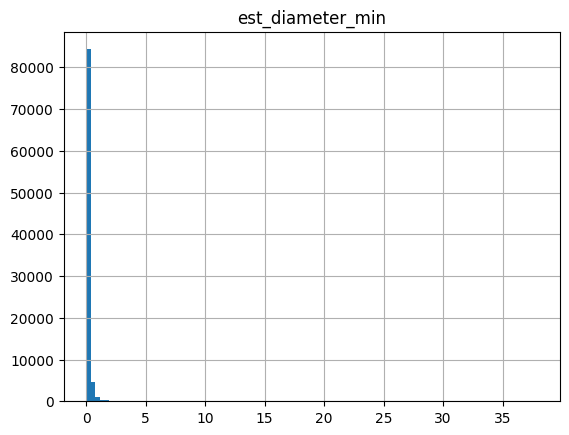

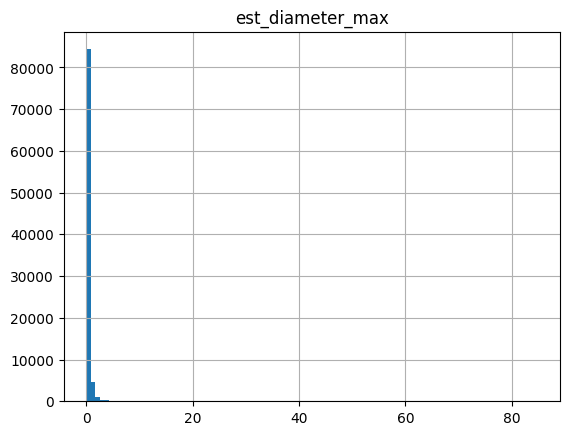

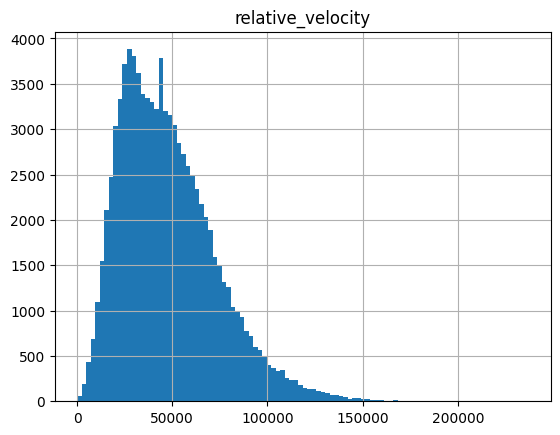

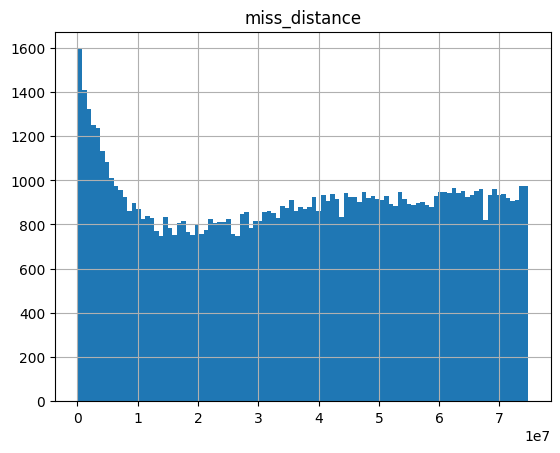

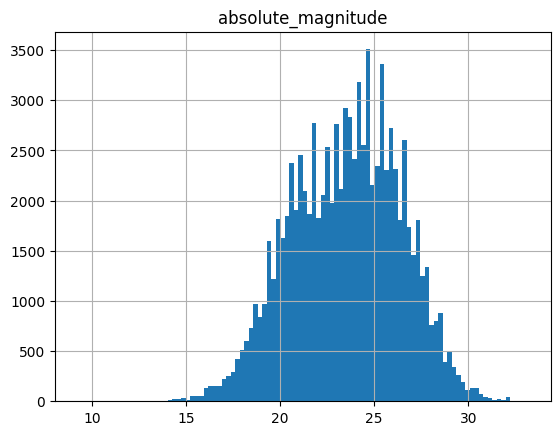

In [19]:
columns = ['est_diameter_min', 'est_diameter_max','relative_velocity', 'miss_distance', 'absolute_magnitude' ]

for column in columns:
    data.hist(column, bins=100 )



**Заключение:**

- наблюдаются высокие выбросы у признаков максимального и минимального диаметров объекта, что заьтрудняет чтение данных

- Наиболее частые значения относительной скорости объектов попадают в диапозон от 30 до 40 тыс. км/ч

- Правый хвост распределения скорости длинный и тонкий, что указывает на редкость объектов с высокой и потенциально опасной для Земли скорости

- На гистограмме признака, указывающего расстояния объектов от Земли, наблюдается резкое начальное снижение количества объектов, по мере увеличения расстояния. Это указывает на то, что гораздо больше объектов пролетают очень близко к Земле, чем те, которые пролетают дальше.

- После снижения (на той же гистограмме) распределение становится похожим на равномерное.

- Пик распределения абсолютной звёздной величины находится от 24 до 26. Т.е большинство объектов имеют среднюю яркость и значит средний размер. 

- Левый склон гистограммы довольно крутой, это указывает на малое количество массивных объектов рядом с Землёй

### Изучение и обработка выбросов

In [20]:
outlier = data[['est_diameter_min', 'est_diameter_max']]

outlier

,est_diameter_min,est_diameter_max
0,0.016016,0.035813
1,0.030518,0.068240
2,0.055533,0.124177
3,0.019256,0.043057
4,0.139494,0.311918
...,...,...
90831,0.017561,0.039268
90832,0.110804,0.247765
90833,0.035039,0.078350
90834,0.044112,0.098637


Нижние пределы для выбросов

In [21]:
Q1 = outlier.quantile(0.25)
Q1

est_diameter_min    0.019256
est_diameter_max    0.043057
Name: 0.25, dtype: float64

Верхние пределы для выбросов

In [22]:
Q3 = outlier.quantile(0.75)
Q3

est_diameter_min    0.143402
est_diameter_max    0.316257
Name: 0.75, dtype: float64

Отфильтруем данные, из которых удалены выбросы

In [23]:
IQR = Q3-Q1

data_filtered = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]
data_filtered

,est_diameter_min,est_diameter_max
0,0.016016,0.035813
1,0.030518,0.068240
2,0.055533,0.124177
3,0.019256,0.043057
4,0.139494,0.311918
...,...,...
90831,0.017561,0.039268
90832,0.110804,0.247765
90833,0.035039,0.078350
90834,0.044112,0.098637


Сохраним отдельный DataFrame без выбросов

In [24]:
index_list = list(data_filtered.index.values)

In [25]:
data_filtered = data[data.index.isin(index_list)]
data_filtered.head()

,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,(2011 GZ2),0.016016,0.035813,56014.078125,1024333.0,26.09,False
1,(2020 HT6),0.030518,0.068240,7864.348145,32681860.0,24.70,False
2,(2016 ED156),0.055533,0.124177,55257.542969,65386360.0,23.41,False
3,(2013 FD8),0.019256,0.043057,41531.406250,12607958.0,25.70,False
4,(2016 CW31),0.139494,0.311918,67639.390625,71305896.0,21.41,False


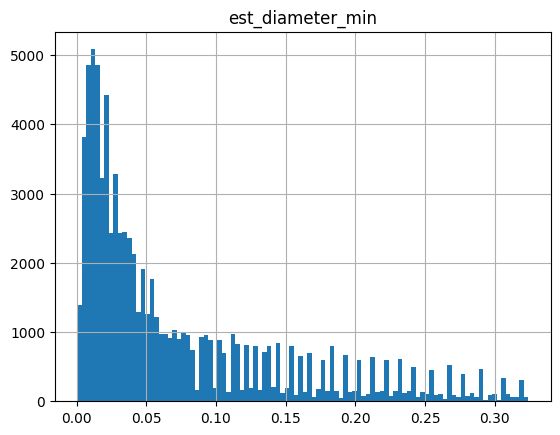

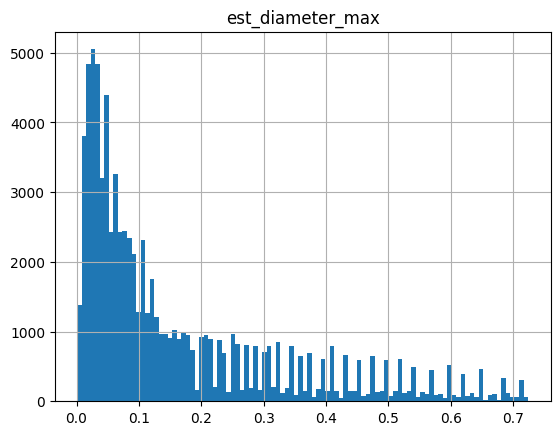

In [26]:
filtered_outlier = data_filtered[['est_diameter_min', 'est_diameter_max']]

for col in filtered_outlier:
    data_filtered.hist(col, bins=100)

#### Анализ данных без выбросов

- Обе гистограммы скошены вправо, то есть большая часть объектов имеют относительно малые диаметры, причём пик достигается вблизи нуля.
- Максимальная оценка охватывает больший диапозон, чем минимальная. Это указывает на значительную неопределённость в оценке размеров этих объектов.

### Изучение факторов, влияющих на угрозу Земли

**1. Связь между потенциально опасными астероидами и их скоростью**

<Figure size 1000x600 with 0 Axes>

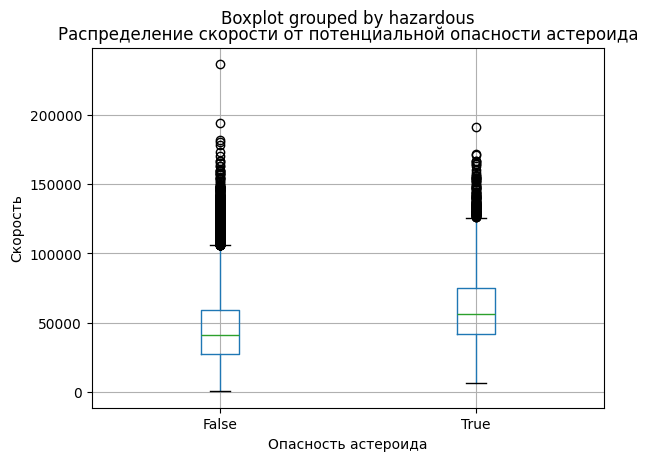

In [27]:
plt.figure(figsize=(10, 6))
data_filtered.boxplot(by='hazardous', column='relative_velocity', grid=True)
plt.title('Распределение скорости от потенциальной опасности астероида')
plt.xlabel('Опасность астероида')
plt.ylabel('Скорость')
plt.show()

**Выводы**

- Наблюдается тенденция увеличения потенциальной опасности астероида от его скорости

- Потенциально опасные астероиды обладают большей скоростью, чем не опасные, однако эта разница не велика

**2. Свзяь между потенциально опасными астероидами и их абсолютной звёздной величины**

<Figure size 1000x600 with 0 Axes>

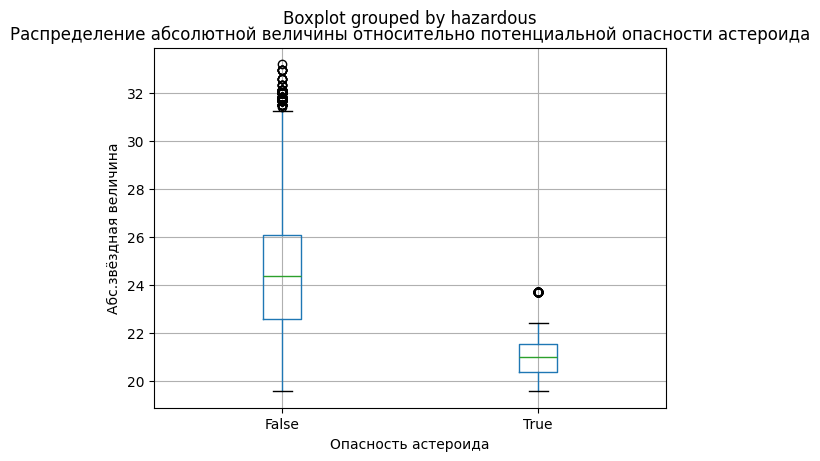

In [28]:
plt.figure(figsize=(10, 6))
data_filtered.boxplot(by='hazardous', column='absolute_magnitude', grid=True)
plt.title('Распределение абсолютной величины относительно потенциальной опасности астероида')
plt.xlabel('Опасность астероида')
plt.ylabel('Абс.звёздная величина')
plt.show()

**Выводы**

- Наблюдается сильная зависимость степени опасности астероида от его абсолютной звёздной величины

- Можно утверждать, что начиная со значения абс.звёздной величины равной 22 и ниже соответсвующие астероиды являются потенциально опасными

- Абсолютная звёдная величина также определяет 

**3. Количество потенциально опасных астероидов**

In [29]:

import plotly.express as px
hazardous_counts = data_filtered['hazardous'].value_counts().reset_index()
hazardous_counts.columns = ['hazardous', 'count']
fig_bar = px.bar(hazardous_counts, x="hazardous", y="count", title="Распределение опасных астероидов")
fig_bar.show()

- Количество опасных астероидов составляет около 6651, когда безопазных примерно 75300, что составляет разницу в более чем 11 раз.

**4. Зависимость расстояния пролёта от Земли и скоростью астероида**

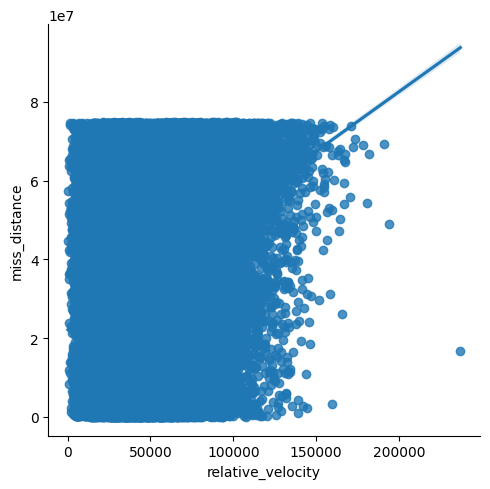

In [30]:
sns.lmplot(x='relative_velocity', y='miss_distance', data=data_filtered)

**Выводы**

- Большое скопление точек внизу, что означает, что большинство астероидов пролетают на небольшом расстоянии от Земли

- По мере увеличения скорости, плотность точек уменьшается. Это говорит о том, что более быстрые астероиды реже пролетают близко к Земле

**5. Тепловая карта корреляции признаков**

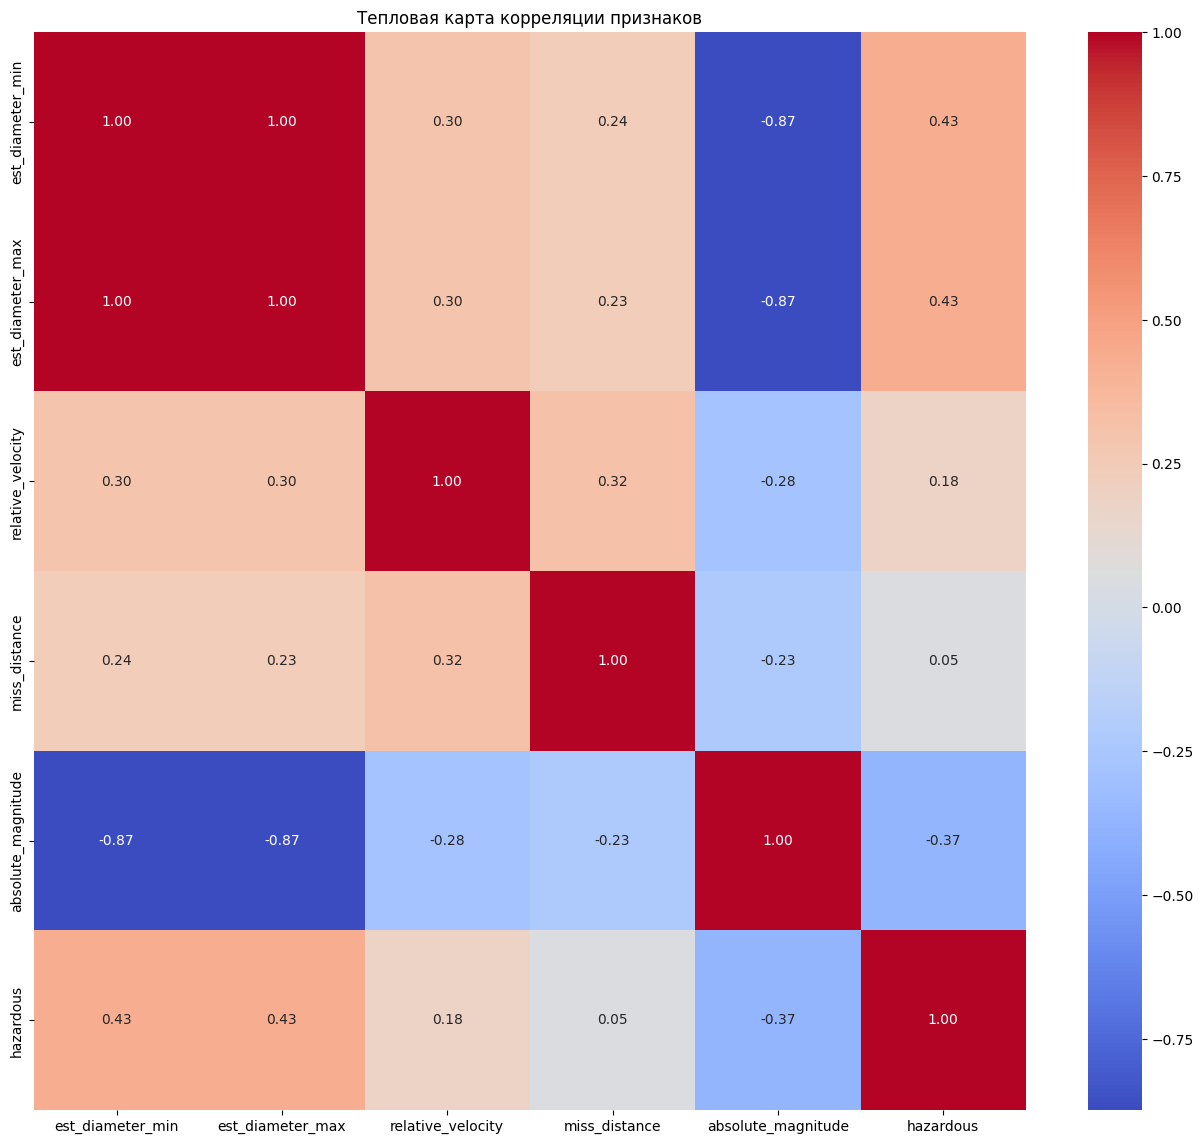

In [31]:
corr_matrix = data_filtered.corr(numeric_only=True) 


plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Тепловая карта корреляции признаков')
plt.show()

**Выводы**

- Высокая обратная зависимость между абс.звёздной величиной астероида и его расчётным диаметром. Это логично, так как меньшая звёздная величина по определению соответсвует большему диаметру астероида.

-  Умеренная корреляуия между скоростью и диаметром астероида

- Умеренная положительная корреляция между диаметром астероида и его потенциальной опасностью 

- Слабая корреляция между расстоянием астероида от Земли и его потенциальной опасностью.

In [32]:
data_filtered['hazardous'] = data_filtered['hazardous'].astype('uint8')

C:\Users\fiks1\AppData\Local\Temp\ipykernel_17040\3892373207.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Сохранение предобработанных данных

In [33]:
data_filtered.to_csv('result_neo.csv', index=False)

data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82468 entries, 0 to 90835
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                82468 non-null  object 
 1   est_diameter_min    82468 non-null  float32
 2   est_diameter_max    82468 non-null  float32
 3   relative_velocity   82468 non-null  float32
 4   miss_distance       82468 non-null  float32
 5   absolute_magnitude  82468 non-null  float64
 6   hazardous           82468 non-null  uint8  
dtypes: float32(4), float64(1), object(1), uint8(1)
memory usage: 3.2+ MB
